In [3]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
from scipy import signal
import kpicdrp.data as data
import kpicdrp.throughput as throughput
import datetime
import time
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [4]:
onaxis_dir = 'onaxis/fluxes/'
glob0 = sorted(glob.glob(onaxis_dir+'*.fits'))
onaxis_data = []
for filename in glob0:
    hdul = fits.open(filename)
    onaxis_data.append(hdul[0].data)

onaxis_data = np.array(onaxis_data)
onaxis_data = np.nanmean(np.squeeze(onaxis_data),axis=0)
order6_onaxis = np.nansum(onaxis_data[6])
print(order6_onaxis)

hdr = hdul[0].header

onaxis_itime = hdr['TRUITIME']
print(onaxis_itime)

27221389.98299777
59.0112


/var/folders/fh/y35_z7xx69qcg_1dsr5v411w0000gn/T/ipykernel_7211/1742071231.py:9: RuntimeWarning: Mean of empty slice
  onaxis_data = np.nanmean(np.squeeze(onaxis_data),axis=0)


In [5]:
o6_rcs = np.load('221011_o6_rcs.npy')

init_frame = 53

frames_ini = np.array([53,54,55])-init_frame
rcs_ini = o6_rcs[frames_ini]

frc_cycle0 = np.array([56,61])-init_frame
rcs_cycle0 = o6_rcs[frc_cycle0]
fprobes_cycle1 = np.array([57,58,59,60])-init_frame
probes_cycle1 = o6_rcs[fprobes_cycle1]

frc_cycle1 = np.array([62,67])-init_frame
rcs_cycle1 = o6_rcs[frc_cycle1]
fprobes_cycle2 = np.array([63,64,65,66])-init_frame
probes_cycle2 = o6_rcs[fprobes_cycle2]

frc_cycle2 = np.array([68,73])-init_frame
rcs_cycle2 = o6_rcs[frc_cycle2]
fprobes_cycle3 = np.array([69,70,71,72])-init_frame
probes_cycle3 = o6_rcs[fprobes_cycle3]

frc_cycle3 = np.array([74,79])-init_frame
rcs_cycle3 = o6_rcs[frc_cycle3]
fprobes_cycle4 = np.array([75,76,77,78])-init_frame
probes_cycle4 = o6_rcs[fprobes_cycle4]

frc_cycle4 = np.array([80,85])-init_frame
rcs_cycle4 = o6_rcs[frc_cycle4]
fprobes_cycle5 = np.array([81,82,83,84])-init_frame
probes_cycle5 = o6_rcs[fprobes_cycle5]

frc_cycle5 = np.array([86,91])-init_frame
rcs_cycle5 = o6_rcs[frc_cycle5]
fprobes_cycle6 = np.array([87,88,89,90])-init_frame
probes_cycle6 = o6_rcs[fprobes_cycle6]

frc_cycle6 = np.array([92,97])-init_frame
rcs_cycle6 = o6_rcs[frc_cycle6]
fprobes_cycle7 = np.array([93,94,95,96])-init_frame
probes_cycle7 = o6_rcs[fprobes_cycle7]

frc_cycle7 = np.array([98,99,100,104,105,106,110,111,112])-init_frame
frc_flat = np.array([101,102,103,107,108,109,113,114,115])-init_frame

cycle7_flist = glob.glob("speckle_m7/fluxes/*.fits")
cycle7_frames = []
for file in cycle7_flist:
    cycle7_frames.append(fits.getdata(file))
cycle7_frames = np.squeeze(np.array(cycle7_frames))
cycle7_rcs = np.nansum(cycle7_frames[:,6,:],axis=1)/order6_onaxis

finalflat_flist = glob.glob("speckle_flat/fluxes/*.fits")
finalflat_frames = []
for file in finalflat_flist:
    finalflat_frames.append(fits.getdata(file))
finalflat_frames = np.squeeze(np.array(finalflat_frames))
finalflat_rcs = np.nansum(finalflat_frames[:,6,:],axis=1)/order6_onaxis

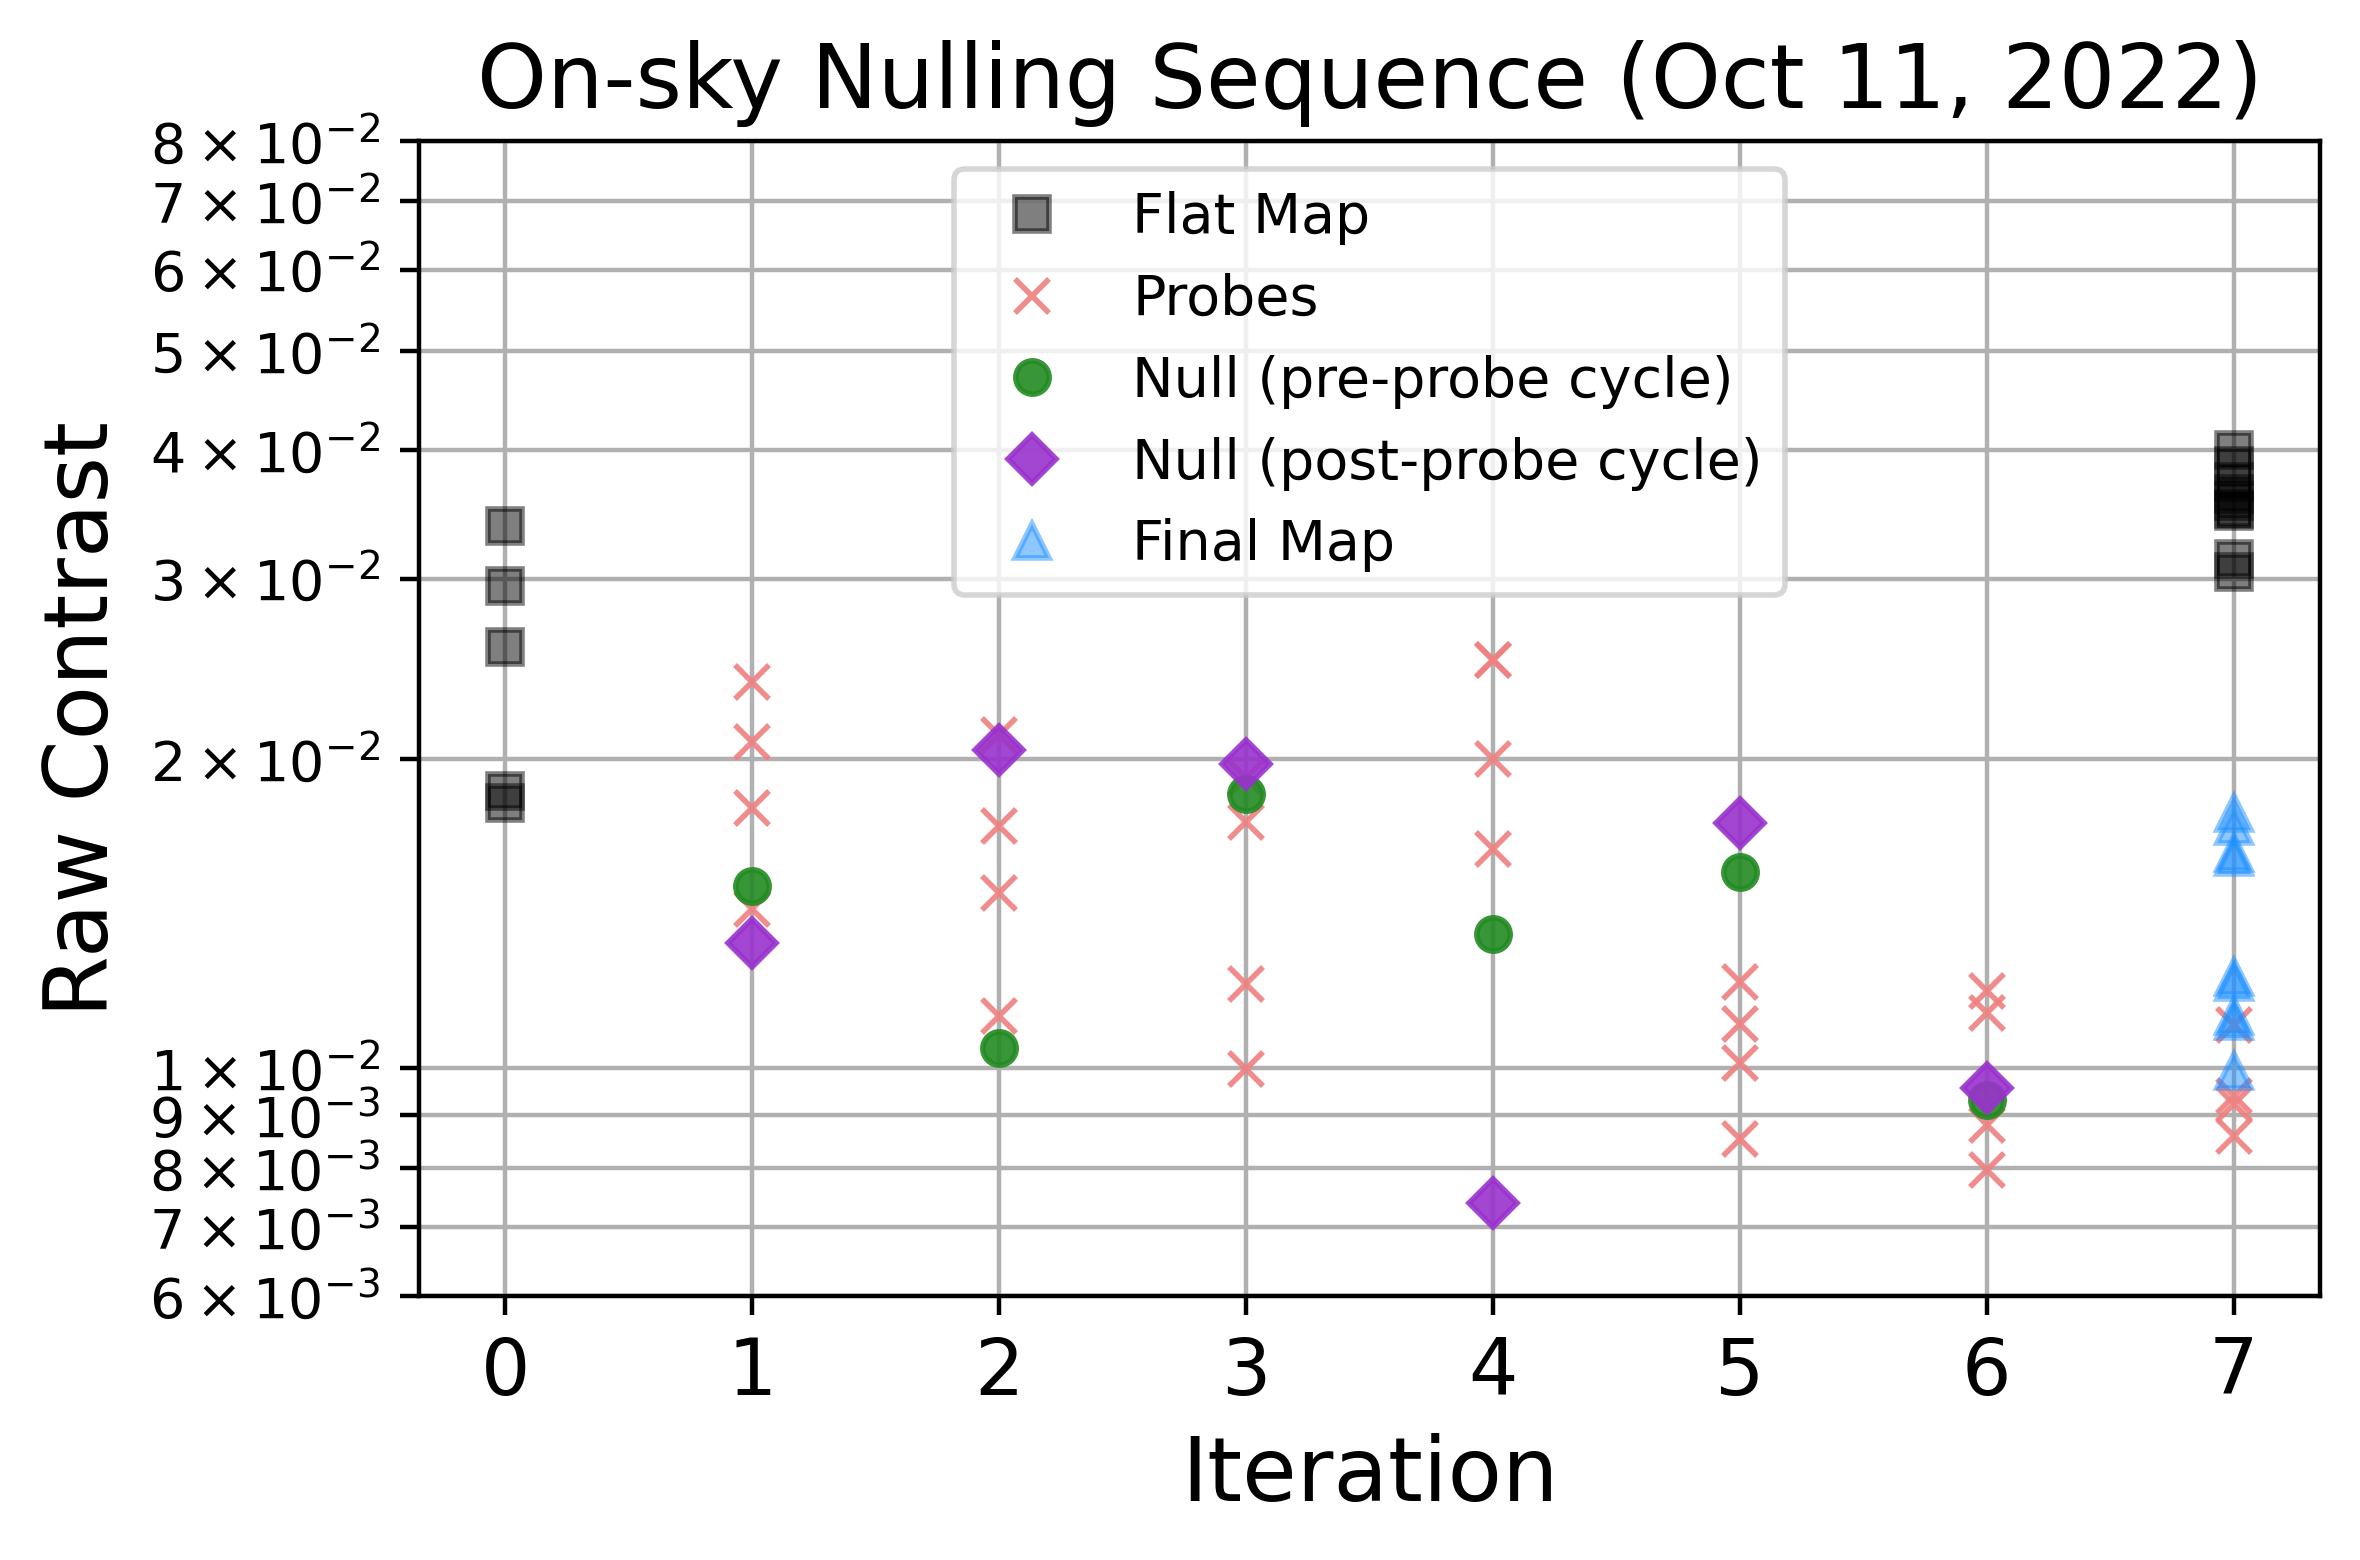

In [6]:
#plot mean rc over top of probes for each iteration
plt.figure(dpi=400)
plt.semilogy(np.zeros(len(rcs_ini)),rcs_ini,linewidth=0,markersize=6,marker='s',color='k',label='Flat Map',alpha=0.5)
plt.semilogy(np.zeros(len(rcs_cycle0)),rcs_cycle0,linewidth=0,markersize=6,marker='s',color='k',alpha=0.5)

plt.semilogy(np.zeros(len(probes_cycle1))+1,probes_cycle1,linewidth=0,markersize=6,marker='x',color='lightcoral',label='Probes',alpha=0.9)
plt.semilogy(1,rcs_cycle1[0],linewidth=0,markersize=6,marker='o',color='forestgreen',label='Null (pre-probe cycle)',alpha=0.9)
plt.semilogy(1,rcs_cycle1[1],linewidth=0,markersize=6,marker='D',color='darkorchid',label='Null (post-probe cycle)',alpha=0.9)

plt.semilogy(np.zeros(len(probes_cycle2))+2,probes_cycle2,linewidth=0,markersize=6,marker='x',color='lightcoral',alpha=0.9)
plt.semilogy(2,rcs_cycle2[0],linewidth=0,markersize=6,marker='o',color='forestgreen',alpha=0.9)
plt.semilogy(2,rcs_cycle2[1],linewidth=0,markersize=6,marker='D',color='darkorchid',alpha=0.9)

plt.semilogy(np.zeros(len(probes_cycle3))+3,probes_cycle3,linewidth=0,markersize=6,marker='x',color='lightcoral',alpha=0.9)
plt.semilogy(3,rcs_cycle3[0],linewidth=0,markersize=6,marker='o',color='forestgreen',alpha=0.9)
plt.semilogy(3,rcs_cycle3[1],linewidth=0,markersize=6,marker='D',color='darkorchid',alpha=0.9)

plt.semilogy(np.zeros(len(probes_cycle4))+4,probes_cycle4,linewidth=0,markersize=6,marker='x',color='lightcoral',alpha=0.9)
plt.semilogy(4,rcs_cycle4[0],linewidth=0,markersize=6,marker='o',color='forestgreen',alpha=0.9)
plt.semilogy(4,rcs_cycle4[1],linewidth=0,markersize=6,marker='D',color='darkorchid',alpha=0.9)

plt.semilogy(np.zeros(len(probes_cycle5))+5,probes_cycle5,linewidth=0,markersize=6,marker='x',color='lightcoral',alpha=0.9)
plt.semilogy(5,rcs_cycle5[0],linewidth=0,markersize=6,marker='o',color='forestgreen',alpha=0.9)
plt.semilogy(5,rcs_cycle5[1],linewidth=0,markersize=6,marker='D',color='darkorchid',alpha=0.9)

#need to scale by tint
tint_rel = 119.497681/59.0112

plt.semilogy(np.zeros(len(probes_cycle6))+6,probes_cycle6/tint_rel,linewidth=0,markersize=6,marker='x',color='lightcoral',alpha=0.9)
plt.semilogy(6,rcs_cycle6[0]/tint_rel,linewidth=0,markersize=6,marker='o',color='forestgreen',alpha=0.9)
plt.semilogy(6,rcs_cycle6[1]/tint_rel,linewidth=0,markersize=6,marker='D',color='darkorchid',alpha=0.9)

plt.semilogy(np.zeros(len(probes_cycle7))+7,probes_cycle7/tint_rel,linewidth=0,markersize=6,marker='x',color='lightcoral',alpha=0.9)
plt.semilogy(np.zeros(len(cycle7_rcs))+7,cycle7_rcs,linewidth=0,markersize=6,marker='^',color='dodgerblue',label='Final Map',alpha=0.5)
plt.semilogy(np.zeros(len(finalflat_rcs))+7,finalflat_rcs,linewidth=0,markersize=6,marker='s',color='k',alpha=0.5)

plt.grid(True)
tick_labels = [r'$6\times10^{-3}$',r'$7\times10^{-3}$',r'$8\times10^{-3}$',r'$9\times10^{-3}$',r'$1\times10^{-2}$',r'$2\times10^{-2}$',r'$3\times10^{-2}$',r'$4\times10^{-2}$',r'$5\times10^{-2}$',r'$6\times10^{-2}$',r'$7\times10^{-2}$',r'$8\times10^{-2}$']
plt.ylim([6e-3,8e-2])
plt.yticks([6e-3,7e-3,8e-3,9e-3,1e-2,2e-2,3e-2,4e-2,5e-2,6e-2,7e-2,8e-2],labels=tick_labels,fontsize=10)
plt.legend(fontsize=10)
plt.xlabel('Iteration',fontsize=16)
plt.ylabel('Raw Contrast',fontsize=16)
plt.title('On-sky Nulling Sequence (Oct 11, 2022)',fontsize=16)
plt.tight_layout()

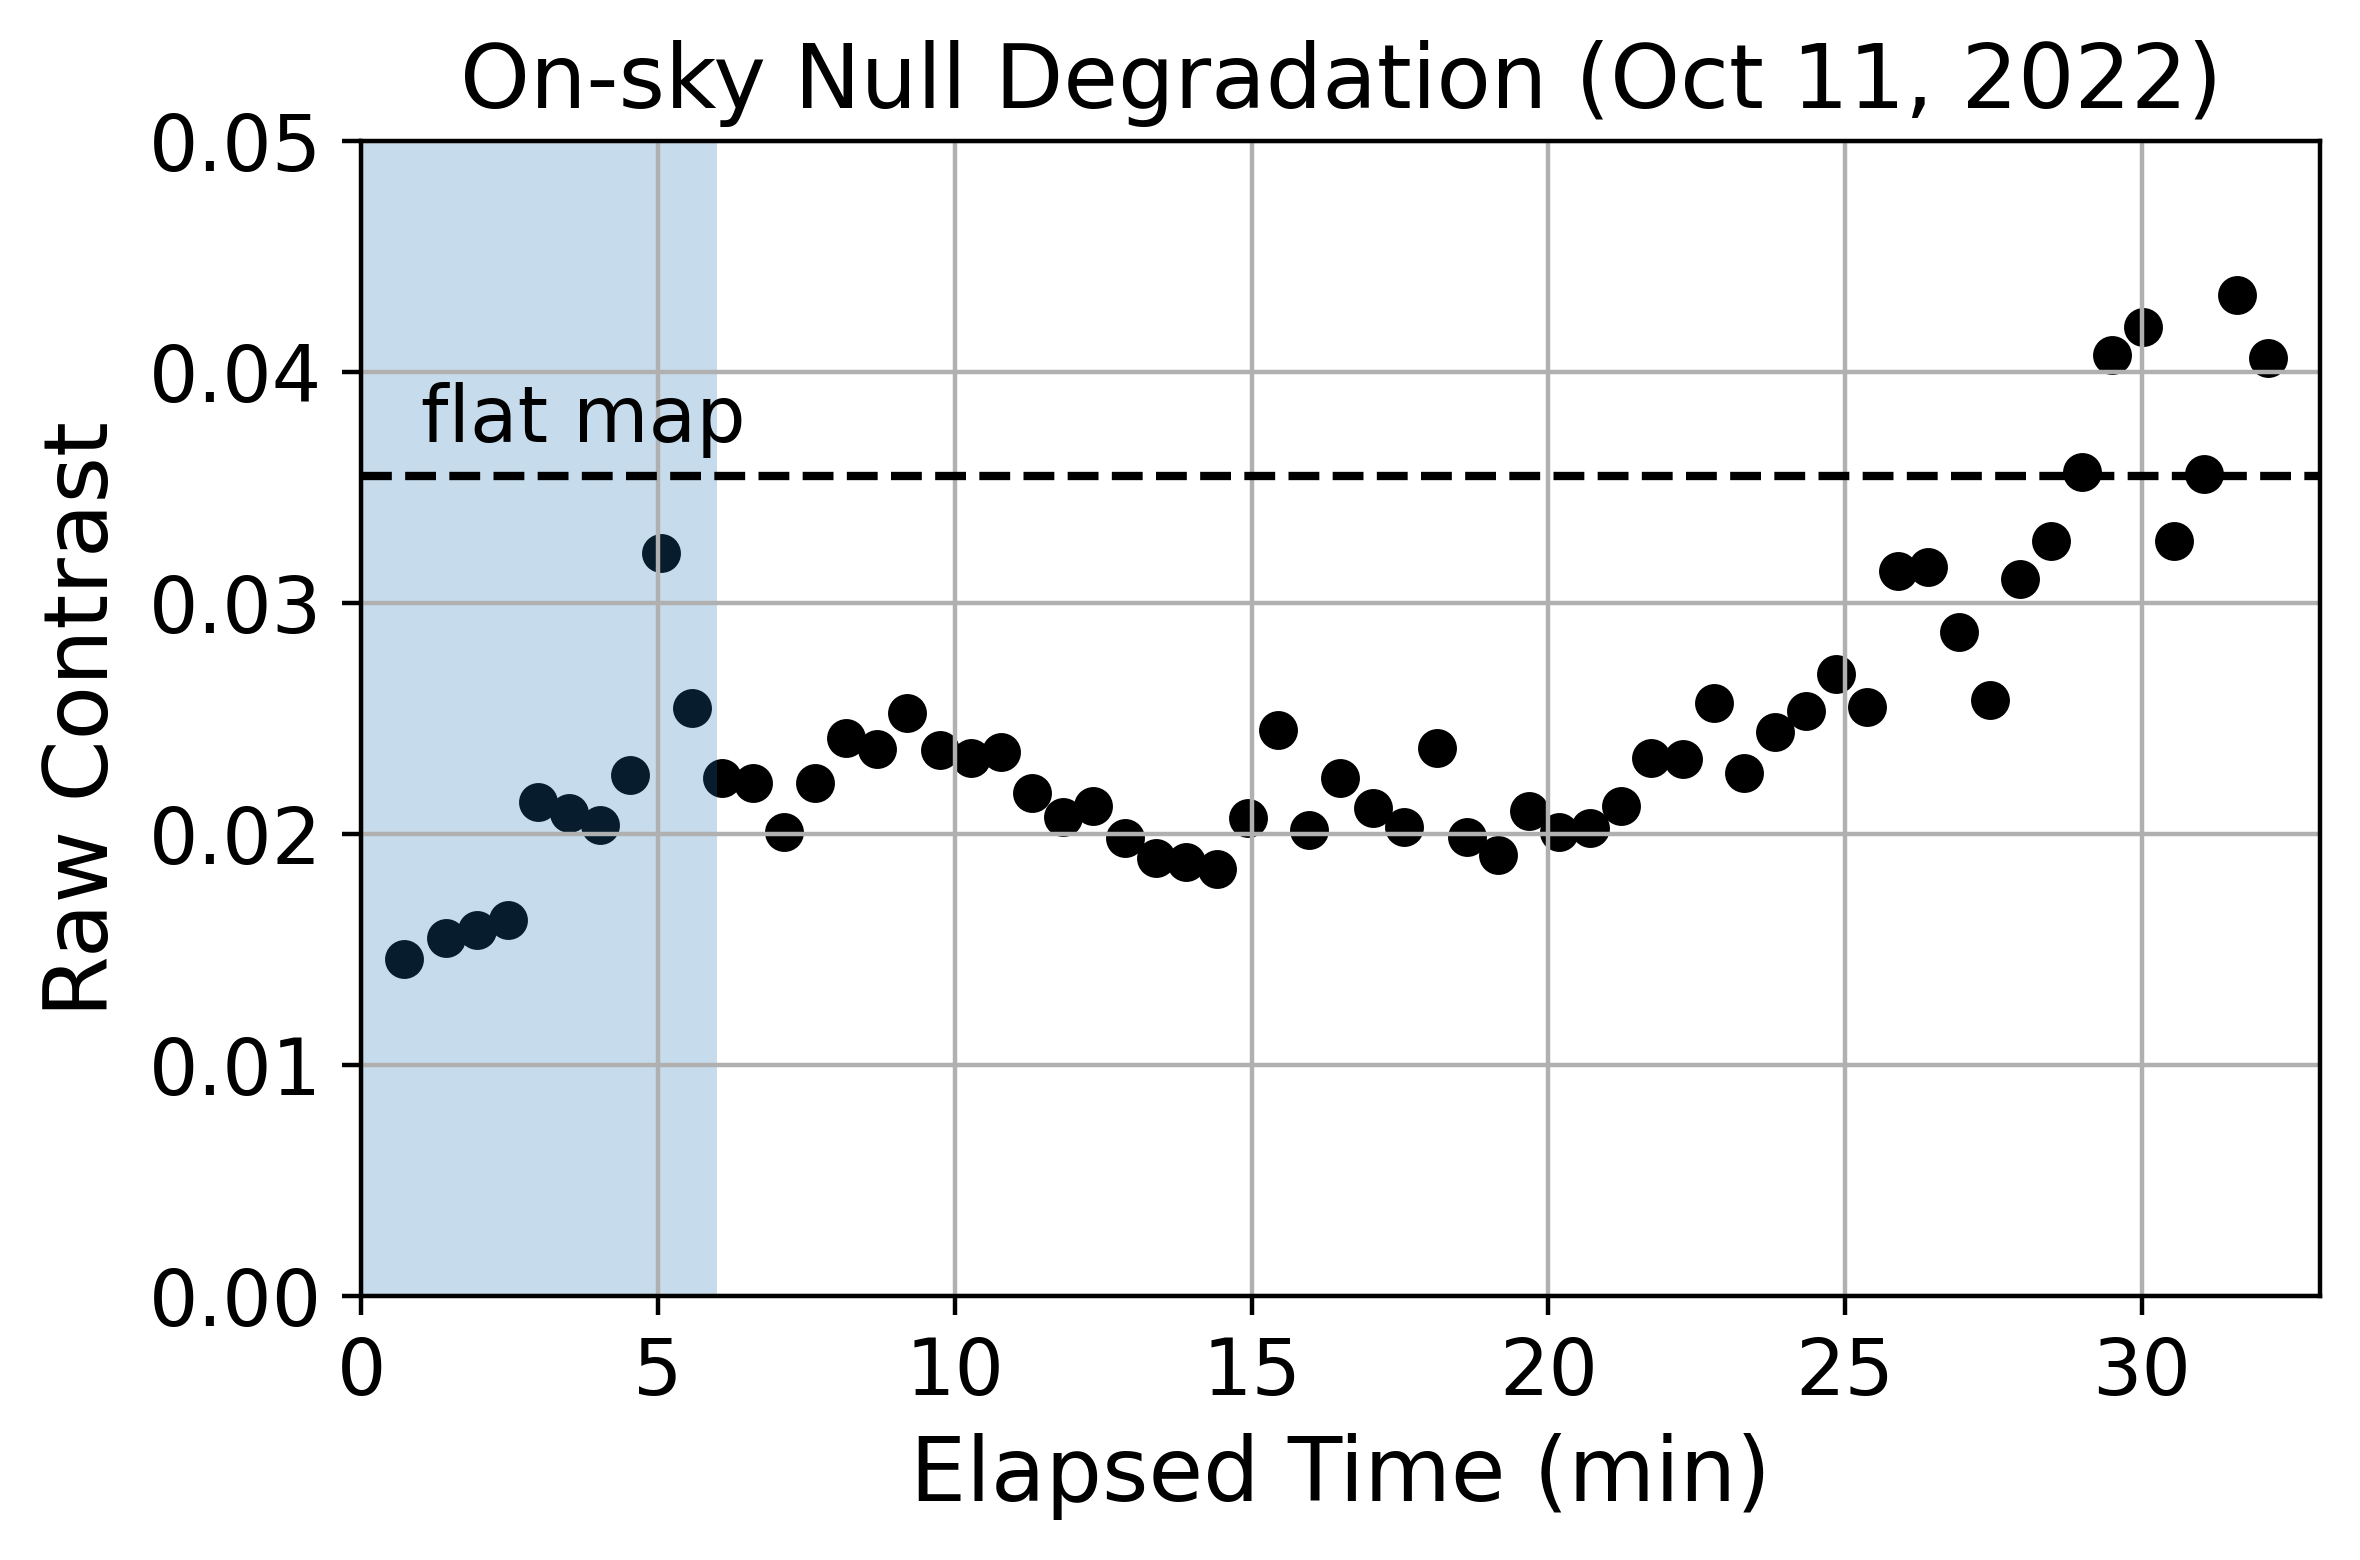

In [7]:
rcs = np.load('221011_ts_rcs.npy')
timestamps_num = np.load('221011_timestamps_num.npy')

finalflat_rc_mean = np.mean(finalflat_rcs)
plt.figure(dpi=400)
plt.scatter(timestamps_num/60,rcs,color='k')
plt.axhline(finalflat_rc_mean,color='k',linestyle='--')
plt.annotate('flat map',(1,0.037),fontsize=14)
plt.xlabel('Elapsed Time (min)',fontsize=16)
plt.ylabel('Raw Contrast',fontsize=16)
ys = np.linspace(0,0.05,100)
plt.xlim([0,33])
plt.ylim([0,0.05])
plt.fill_betweenx(ys,0,6,alpha=0.25)
plt.grid('on')
plt.title('On-sky Null Degradation (Oct 11, 2022)',fontsize=16)
plt.tight_layout()